# Comparison: Heart
https://archive.ics.uci.edu/ml/datasets/heart+disease

In [ ]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive/')
sys.path.append('/content/drive/MyDrive/Project/EDQC/dqc')

Mounted at /content/drive/


## Initialization

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils.visualization import animator


## Reading Data

In [ ]:
heart = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', header=None)
label = 'heart'

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       294 non-null    int64  
 1   1       294 non-null    int64  
 2   2       294 non-null    int64  
 3   3       294 non-null    object 
 4   4       294 non-null    object 
 5   5       294 non-null    object 
 6   6       294 non-null    object 
 7   7       294 non-null    object 
 8   8       294 non-null    object 
 9   9       294 non-null    float64
 10  10      294 non-null    object 
 11  11      294 non-null    object 
 12  12      294 non-null    object 
 13  13      294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [ ]:
heart.replace('?', np.nan, inplace=True)

In [ ]:
heart[3] = heart[3].apply(lambda r: int(r) if type(r) == str else r).astype('Int64')

In [ ]:
heart[3].min(), heart[3].max()

(92, 200)

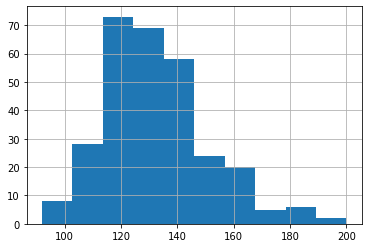

In [ ]:
heart[3].hist()

In [ ]:
heart[4] = heart[4].apply(lambda r: int(r) if type(r) == str else r).astype('Int64')

In [ ]:
heart[4].min(), heart[4].max()

(85, 603)

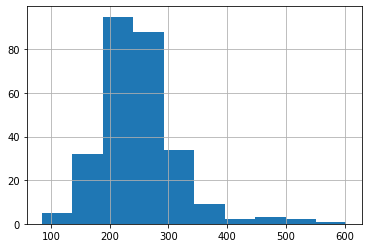

In [ ]:
heart[4].hist()

In [ ]:
heart[5] = heart[5].apply(lambda r: int(r) if type(r) == str else r).astype('Int64')

In [ ]:
heart[5].min(), heart[5].max()

(0, 1)

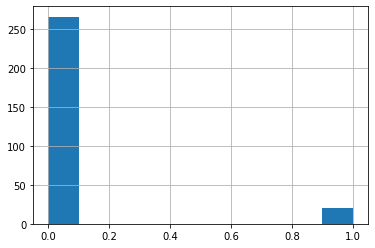

In [ ]:
heart[5].hist()

In [ ]:
heart[6] = heart[6].apply(lambda r: int(r) if type(r) == str else r).astype('Int64')

In [ ]:
heart[6].min(), heart[6].max()

(0, 2)

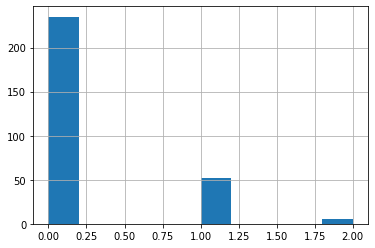

In [ ]:
heart[6].hist()

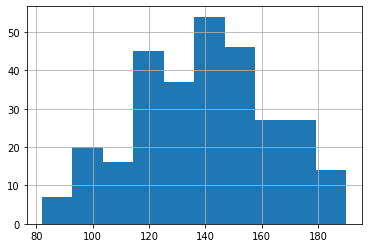

In [ ]:
heart[7] = heart[7].apply(lambda r: int(r) if type(r) == str else r).astype('Int64')
heart[7].hist()

In [ ]:
heart[7].min(), heart[7].max()

(82, 190)

(0, 1)

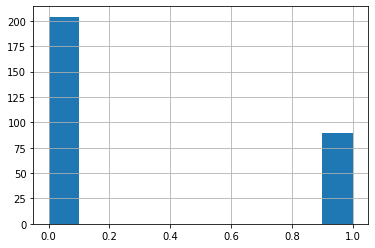

In [ ]:
heart[8] = heart[8].apply(lambda r: int(r) if type(r) == str else r).astype('Int64')
heart[8].hist()
heart[8].min(), heart[8].max()

(0.0, 5.0)

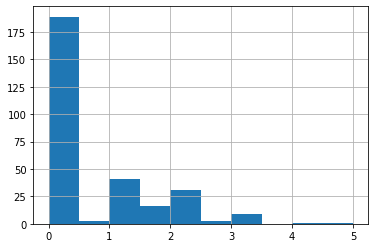

In [ ]:
heart[9] = heart[9].apply(lambda r: float(r) if type(r) == str else r).astype('float64')
heart[9].hist()
heart[9].min(), heart[9].max()

(1, 3)

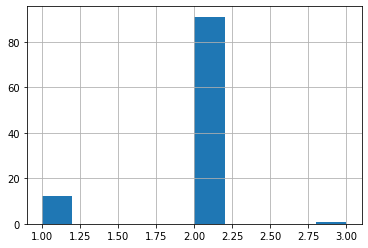

In [ ]:
heart[10] = heart[10].apply(lambda r: int(r) if type(r) == str else r).astype('Int64')
heart[10].hist()
heart[10].min(), heart[10].max()

(0, 0)

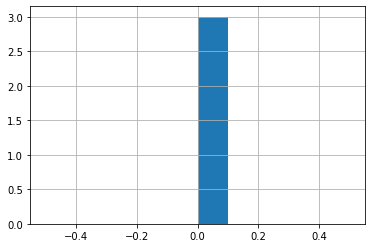

In [ ]:
heart[11] = heart[11].apply(lambda r: int(r) if type(r) == str else r).astype('Int64')
heart[11].hist()
heart[11].min(), heart[11].max()

In [ ]:
heart.drop(11, axis=1, inplace=True)

(3, 7)

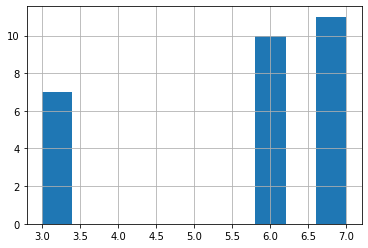

In [ ]:
heart[12] = heart[12].apply(lambda r: int(r) if type(r) == str else r).astype('Int64')
heart[12].hist()
heart[12].min(), heart[12].max()

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       294 non-null    int64  
 1   1       294 non-null    int64  
 2   2       294 non-null    int64  
 3   3       293 non-null    Int64  
 4   4       271 non-null    Int64  
 5   5       286 non-null    Int64  
 6   6       293 non-null    Int64  
 7   7       293 non-null    Int64  
 8   8       293 non-null    Int64  
 9   9       294 non-null    float64
 10  10      104 non-null    Int64  
 11  12      28 non-null     Int64  
 12  13      294 non-null    int64  
dtypes: Int64(8), float64(1), int64(4)
memory usage: 32.3 KB


In [ ]:
heart.drop_duplicates(inplace=True)

In [ ]:
heart[13].value_counts()

0    187
1    106
Name: 13, dtype: int64

In [ ]:
classes = heart[13]
heart.drop(13, axis=1, inplace=True)

In [ ]:
heart.head()

,0,1,2,3,4,5,6,7,8,9,10,12
0,28,1,2,130,132,0,2,185,0,0.0,<NA>,<NA>
1,29,1,2,120,243,0,0,160,0,0.0,<NA>,<NA>
2,29,1,2,140,<NA>,0,0,170,0,0.0,<NA>,<NA>
3,30,0,1,170,237,0,1,170,0,0.0,<NA>,6
4,31,0,2,100,219,0,1,150,0,0.0,<NA>,<NA>


In [ ]:
heart

,0,1,2,3,4,5,6,7,8,9,10,12
0,28,1,2,130,132,0,2,185,0,0.0,<NA>,<NA>
1,29,1,2,120,243,0,0,160,0,0.0,<NA>,<NA>
2,29,1,2,140,<NA>,0,0,170,0,0.0,<NA>,<NA>
3,30,0,1,170,237,0,1,170,0,0.0,<NA>,6
4,31,0,2,100,219,0,1,150,0,0.0,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,<NA>,<NA>
290,54,0,3,130,294,0,1,100,1,0.0,2,<NA>
291,56,1,4,155,342,1,0,150,1,3.0,2,<NA>
292,58,0,2,180,393,0,0,110,1,1.0,2,7


## Exploratory Data Analysis

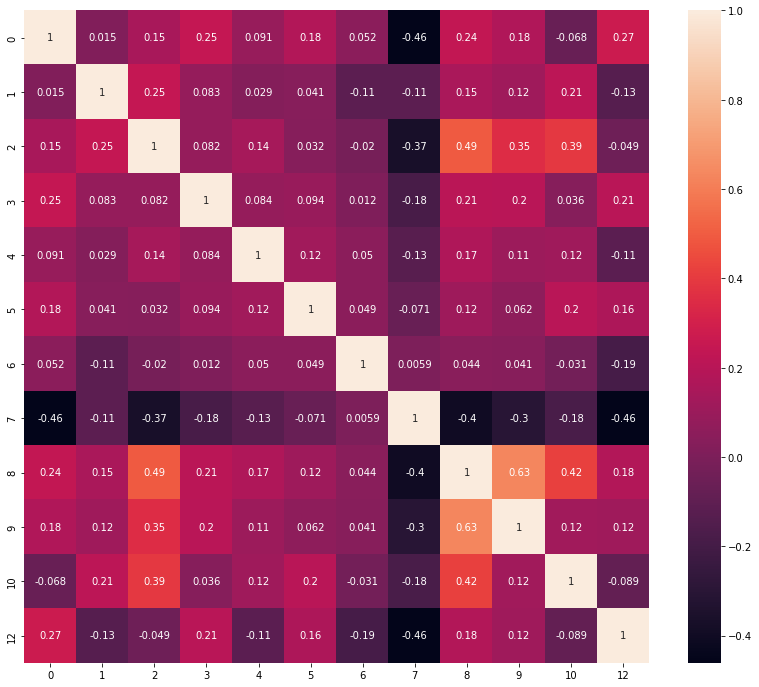

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(heart.corr(), annot=True)

In [ ]:
df = heart.replace(np.nan, 0)

from sklearn.decomposition import PCA

pca = PCA(n_components=6, random_state=0)
df = pd.DataFrame(pca.fit_transform(df))


In [ ]:
ddf = heart.drop([1,2,5,6,8,9, 10,12],axis=1)
ddf['class'] = classes

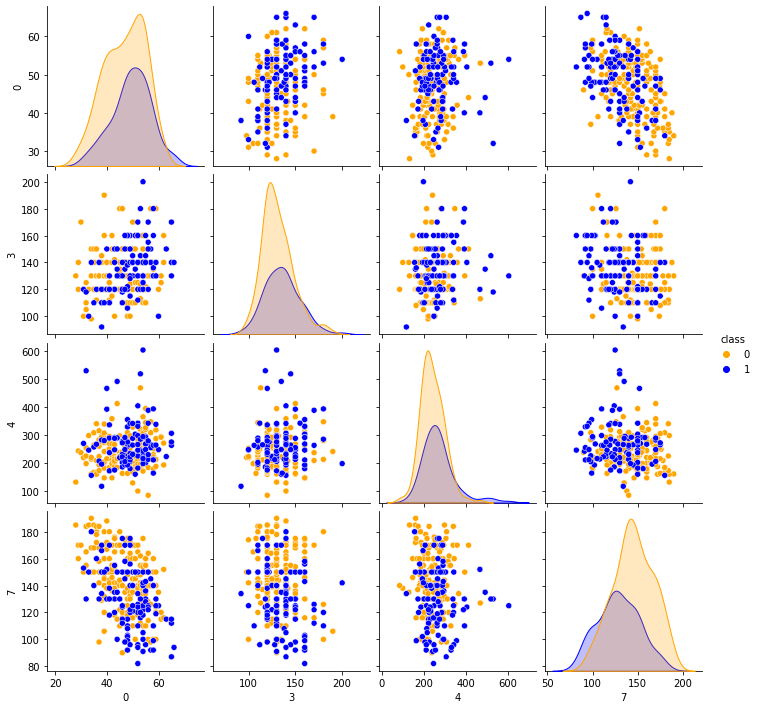

In [ ]:
sns.pairplot(ddf, hue='class', palette={0: 'orange', 1:'blue'})

In [ ]:
df

,0,1,2,3,4,5
0,-101.238566,-46.346695,0.218286,12.617822,-0.345466,0.026905
1,10.333701,-25.036456,12.094123,14.286686,-0.513106,-0.598584
2,-232.792500,-27.379866,-8.705063,14.713681,-0.146968,-0.141026
3,4.206649,-31.369221,-38.417377,16.696636,5.511338,-1.661237
4,-13.442812,-15.556231,32.555205,11.782864,-0.557812,-0.587321
...,...,...,...,...,...,...
288,100.155201,43.878653,-24.412604,5.030682,-0.616304,-0.073280
289,62.957945,37.252852,4.719888,-0.759084,-0.680252,-0.281232
290,109.755227,-11.313704,-24.203626,-7.424813,-0.570016,2.652280
291,161.810585,28.692839,-45.994385,-1.258755,6.225163,-0.949886


In [ ]:
classes

0      0
1      0
2      0
3      0
4      0
      ..
289    1
290    1
291    1
292    1
293    1
Name: 13, Length: 293, dtype: int64

In [ ]:
heart.drop('class', axis=1, inplace=True)

Text(0.5, 0.92, '3D plot of KMeans Clustering')

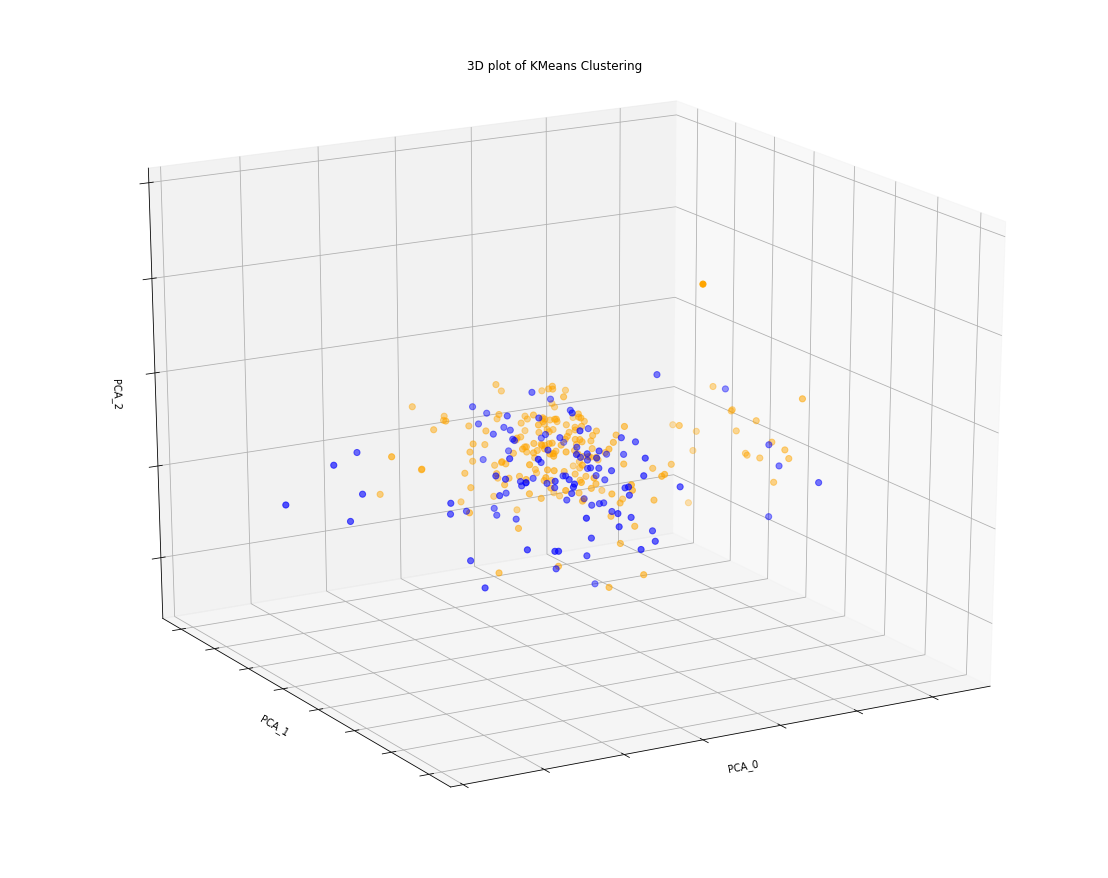

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = classes.apply(lambda r: ['orange', 'blue'][r])
ax.scatter(df[0], df[1], df[2], c=labels, marker='.', s=150)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA_0')
ax.set_ylabel('PCA_1')
ax.set_zlabel('PCA_2')
ax.set_title('3D plot of KMeans Clustering')


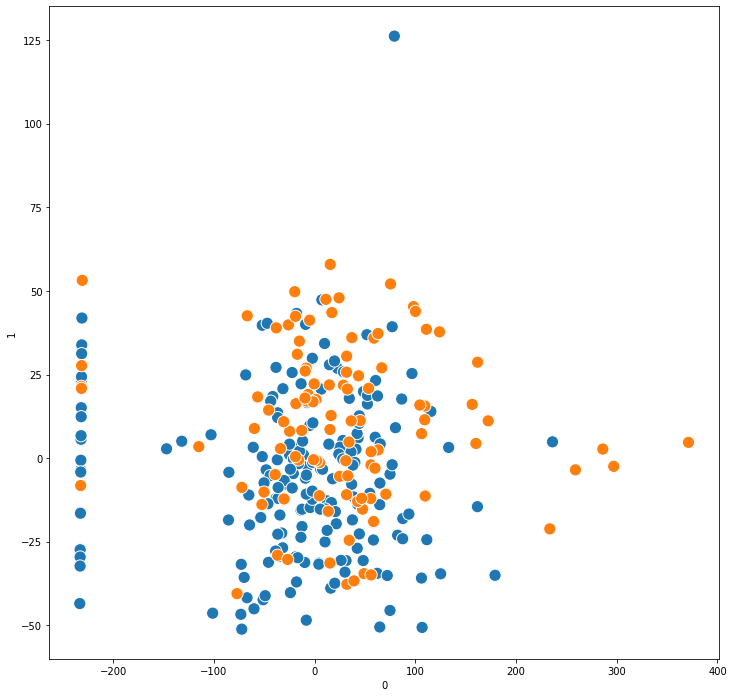

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df[0], y=df[1], hue=labels, legend=False, s=150,)
# plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=150, c='black')

## 

In [ ]:
from   model.dqc import DQC
import model.base_dqc as dqc

In [ ]:
classes

0      0
1      0
2      0
3      0
4      0
      ..
289    1
290    1
291    1
292    1
293    1
Name: 13, Length: 293, dtype: int64

In [ ]:
def run_model(df, SIGMA = 0.01, M = 0.07):
  edqc = DQC(df)
  edqc.calculate_N(SIGMA)
  N = np.array(edqc.N)
  data_fit = np.array(edqc.data_fit)
  H = dqc.calculate_H(data_fit,SIGMA,M)
  H = dqc.basis_transform(H,N)
  H = (np.abs(H) <= 1) * 1 + (np.abs(H) > 1) * -1
  X = dqc.calculate_X(data_fit,M)
  X = dqc.basis_transform(X,N,is_expectation=True)

  P,H = dqc.diagonalize_H(H)

  H = np.round(H, 4)

  # H = H < -4

  traj,N_traj = dqc.trajectory(df,P,H,X,N,steps=10000,delta=10**4,sigma=SIGMA,m=M,stride=50)
  S = dqc.reverse_entropy(traj, N_traj)

  return N, H, X , P, traj, N_traj, S

In [ ]:
dd = heart.replace(np.nan, 0.)

for col in dd.columns:
  dd[col] = dd[col].astype('float')
  dd[col] = (dd[col] - dd[col].min())/(dd[col].max() - dd[col].min())

In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       293 non-null    float64
 1   1       293 non-null    float64
 2   2       293 non-null    float64
 3   3       293 non-null    float64
 4   4       293 non-null    float64
 5   5       293 non-null    float64
 6   6       293 non-null    float64
 7   7       293 non-null    float64
 8   8       293 non-null    float64
 9   9       293 non-null    float64
 10  10      293 non-null    float64
 11  12      293 non-null    float64
dtypes: float64(12)
memory usage: 37.9 KB


In [ ]:
dd.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12], dtype='object')

In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       293 non-null    int64  
 1   1       293 non-null    int64  
 2   2       293 non-null    int64  
 3   3       293 non-null    Int64  
 4   4       293 non-null    Int64  
 5   5       293 non-null    Int64  
 6   6       293 non-null    Int64  
 7   7       293 non-null    Int64  
 8   8       293 non-null    Int64  
 9   9       293 non-null    float64
 10  10      293 non-null    Int64  
 11  12      293 non-null    Int64  
dtypes: Int64(8), float64(1), int64(3)
memory usage: 40.1 KB


In [ ]:
N, H, X , P, traj, N_traj, S = run_model(dd, SIGMA = .5, M = 0.1)

/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:391: RuntimeWarning: divide by zero encountered in double_scalars
  S[step] = S[step] - 1/p * np.log(1/p)


In [ ]:
S

array([          -inf, 2.59939677e-08, 5.12002340e-09, 1.34961421e-08,
       4.23128727e-08, 7.51659175e-10, 3.56207555e-08, 5.65906630e-09,
       2.36036685e-08, 1.72587729e-11, 1.27416855e-09, 2.49447192e-07,
       1.13293157e-09, 8.61917266e-10, 5.70530843e-10, 9.45537225e-09,
       2.84590001e-09, 2.38294617e-09, 3.21095500e-09, 2.17984195e-10,
       1.92223368e-07, 9.12258301e-08, 2.08841955e-09, 1.03496824e-10,
       1.37496784e-08, 5.82497051e-09, 1.01596574e-07, 3.49878704e-09,
       2.11045459e-08, 7.13754136e-08, 6.44820261e-11, 1.00749400e-08,
       1.05092587e-08, 4.01828822e-09, 1.72181357e-08, 2.44383782e-10,
       1.37244732e-08, 2.08716241e-08, 2.24397354e-09, 5.55062970e-08,
       6.87719453e-08, 4.19155228e-09, 3.16687766e-09, 4.23609694e-08,
       8.63972185e-10, 2.04312873e-09, 3.96183981e-12, 1.04288599e-07,
       9.90683981e-10, 5.07753498e-10, 1.84663624e-09, 2.24197102e-08,
       7.33493126e-09, 1.84295088e-10, 1.20837298e-07, 4.90908471e-11,
      

In [ ]:
H.diagonal()

array([ 2.808388e+02, -1.706910e+01, -1.527770e+01, -1.428610e+01,
       -1.346150e+01, -1.277150e+01, -1.223580e+01, -1.189740e+01,
       -1.115630e+01,  7.270900e+00,  7.121700e+00,  6.787000e+00,
        6.540800e+00,  6.443800e+00,  6.275500e+00, -1.075070e+01,
       -1.058010e+01, -1.030670e+01, -1.015100e+01, -9.977800e+00,
       -9.732400e+00, -9.624800e+00, -9.583400e+00,  5.990000e+00,
        5.922100e+00,  5.764500e+00,  5.647100e+00,  5.547600e+00,
        5.393200e+00,  5.282300e+00,  5.103200e+00,  5.049900e+00,
        4.977100e+00,  4.907200e+00,  4.750400e+00, -9.266200e+00,
       -9.140000e+00, -8.905100e+00, -8.829600e+00, -8.694900e+00,
       -8.564000e+00, -8.451200e+00, -8.387900e+00, -8.283100e+00,
       -8.181500e+00, -8.096600e+00, -7.913000e+00, -7.992700e+00,
        4.622700e+00,  4.555100e+00,  4.359200e+00,  4.295400e+00,
        4.232300e+00,  4.108800e+00,  4.037900e+00,  4.021300e+00,
       -7.782900e+00, -7.735600e+00, -7.728900e+00, -7.588900e

In [ ]:
H_ = pd.DataFrame(H.diagonal(), columns=['H'])
H_['class'] = classes

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


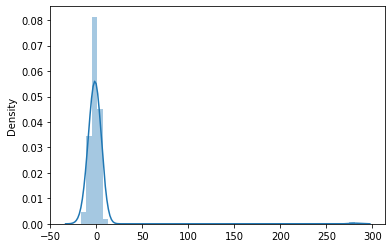

In [ ]:
sns.distplot(H.diagonal())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


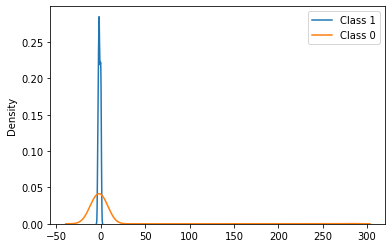

In [ ]:
# sns.distplot(H.diagonal(), hist=False, label='All states')
HH = H.diagonal()
c = classes.reset_index(drop=True)
lc = list(c[c == 0].index)
ll = list(c[c == 1].index)
sns.distplot(HH[ll],hist=False, label='Class 1')
sns.distplot(HH[lc],hist=False, label='Class 0')
plt.legend()

Text(0, 0.5, 'Reverse Entropy (1/S)')

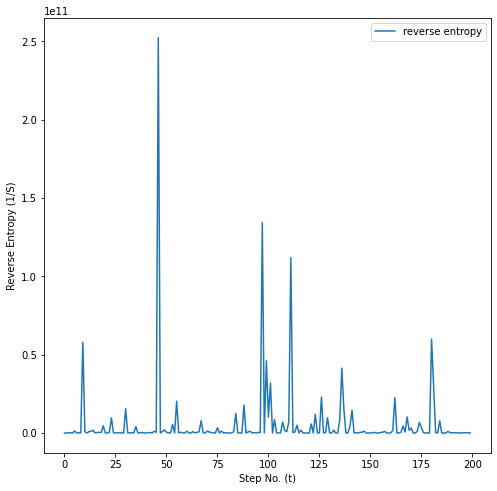

In [ ]:
ax = pd.DataFrame(1/S, columns=['reverse entropy']).plot(figsize=(8,8), )
ax.set_xlabel("Step No. (t)")
ax.set_ylabel("Reverse Entropy (1/S)")

In [ ]:
np.where((1/S).max() == 1/S)

(array([46]),)

In [ ]:
S[4]

4.231287274679892e-08

In [ ]:
S[46]

3.961839808833844e-12

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

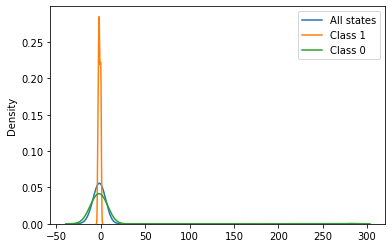

In [ ]:
sns.distplot(H.diagonal(), hist=False, label='All states')
HH = H.diagonal()
c = classes.reset_index(drop=True)
lc = list(c[c == 0].index)
ll = list(c[c == 1].index)
sns.distplot(HH[ll],hist=False, label='Class 1')
sns.distplot(HH[lc],hist=False, label='Class 0')
plt.legend()

In [ ]:
l = np.round(HH , 1)

In [ ]:
l[l<-2].mean(), l[l>2].mean(),l[np.abs(l)<2].mean()

(-5.853731343283582, 8.83793103448276, -0.03863636363636362)

In [ ]:
classes[classes==1]

188    1
189    1
190    1
191    1
192    1
      ..
289    1
290    1
291    1
292    1
293    1
Name: 13, Length: 106, dtype: int64

In [ ]:
color_selection = [((0, 187), 'blue'), ((188, 293), 'orange')]

In [ ]:
directory = '/content/drive/MyDrive/Project/EDQC/data/uci/{}/'.format(label.lower())

if not os.path.exists(directory):
        os.mkdir(directory)
        
os.chdir(directory)

_tmp = dqc.plot_steps(traj, color_selections=color_selection)
del(_tmp)

animator()

/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:326: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>